###      Vishnu Vardhan Belide  |      01-31-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats
import warnings
warnings.filterwarnings('ignore',category= FutureWarning)
warnings.filterwarnings('ignore', category= DeprecationWarning)
%matplotlib inline

In [2]:
df =pd.read_csv('Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
df.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


Categorical Variables are Sex, Rank and Discipline.
Also from above, count values in all the columns are equal to 397 implies no missing values. we can also use seaborn heat map to confirm that there are no missing values

### Exploratory Data Analysis

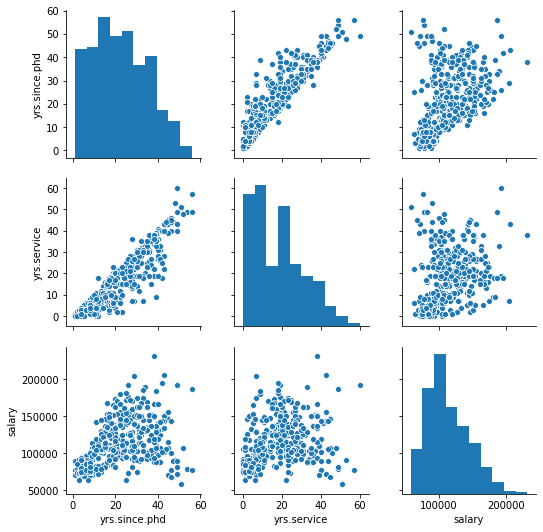

In [4]:
sns.pairplot(df)

We can see there is some correlation between in salary vs yrs.phd and salary vs yrs.service. The table below gives correlation between variables

In [5]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


 It appears that both the continous variables are dependent on each other

### Qualitative Variables

In [6]:
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [7]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [8]:
df['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

### Quantitative Variables

Text(0.5, 1.0, 'distribution of salary')

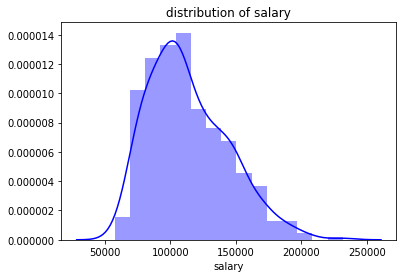

In [9]:
sns.distplot(df['salary'],hist = True,color = 'b', label = 'Actual Values')
plt.title("distribution of salary")

Text(0.5, 1.0, 'salary vs years since Ph.D.')

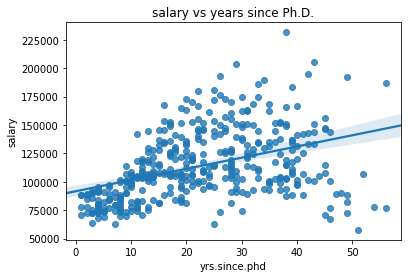

In [10]:
sns.regplot(x= 'yrs.since.phd', y='salary',data = df)
plt.title("salary vs years since Ph.D.")


Text(0.5, 1.0, 'salary vs years of service')

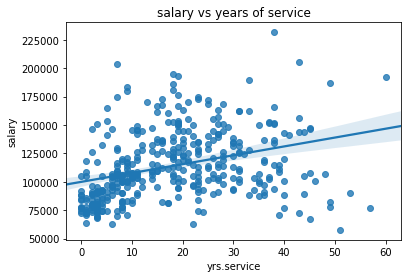

In [11]:
sns.regplot(x= 'yrs.service', y='salary',data = df)
plt.title("salary vs years of service")

Both the quantitative variables years since phd and years of service have a positive correlation with salary and they both have a strong correlation with each other.

### Solutions to Questions

#### (1) What percentage of records are Assistant Professors with less than 5 years of experience? 

In [12]:
x = df[(df['rank'] == 'AsstProf') & (df['yrs.service'] <5)].shape[0]
y =df.shape[0]
x
print("The percentage of assistant professors with less that 5 years of experience is:",round((x/y)*100,2),"%")

The percentage of assistant professors with less that 5 years of experience is: 15.87 %


#### (2) Is there a statistically significant difference between female and male salaries? 

Text(0.5, 1.0, 'Boxplot of salaries of different sex')

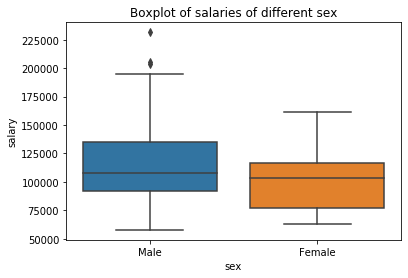

In [13]:
sns.boxplot(x = 'sex',y = 'salary', data = df)
plt.title("Boxplot of salaries of different sex")

There is no significant difference in salaries by sex but plotting salaries with discipline along with years since phd or years of service might give better idea

Text(0.5, 1, 'scatter plot of salary and years since Ph.D for Male and Female')

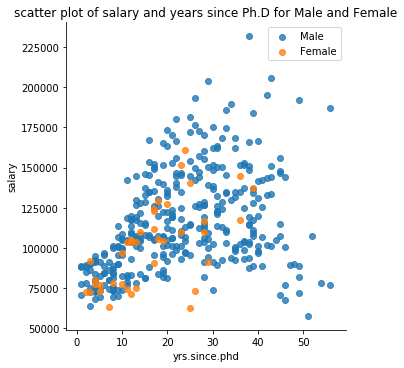

In [14]:
sns.lmplot( x="yrs.since.phd", y="salary", data=df, fit_reg=False, hue='sex', legend=False)
plt.legend(loc='upper right')
plt.title("scatter plot of salary and years since Ph.D for Male and Female")

There does not appear to be a strong relationship between nine-month salary and sex or between sex and years since phd. However, as noted previously, more observations in this dataset are from male faculty members (n = 358) compared to female faculty members (n = 39 ). I'd like to confirm that there is no statistical difference between male and female salary using t-test

### T test

In [15]:
Male_data = np.asarray(df[df['sex'] == 'Male'].salary)
Female_data = np.asarray(df[df['sex'] == 'Female'].salary)

In [16]:
stats.ttest_ind(Male_data,Female_data,equal_var= False)

Ttest_indResult(statistic=3.161474091674088, pvalue=0.0026636179399639934)

Therefore, there is no statistical significant difference in salaries 

#### (3) What is the distribution of salary by rank and discipline? 

Text(0.5, 1.0, 'Boxplot of salaries of different ranks')

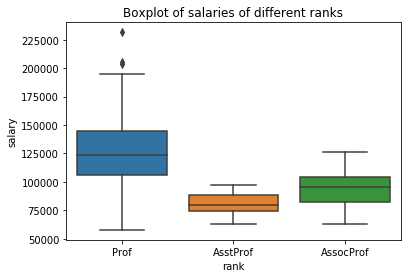

In [17]:
sns.boxplot(x = 'rank',y = 'salary', data = df)
plt.title("Boxplot of salaries of different ranks")

From above, it appears that salary of professors depends on rank which is true in general.

In general, higher the rank of professor the better his salary would be. By combing rank with other variables like years of service or years since phd we could capture the relationship between variables 

Text(0.5, 1, 'scatter plot of salary and years of service for different ranks')

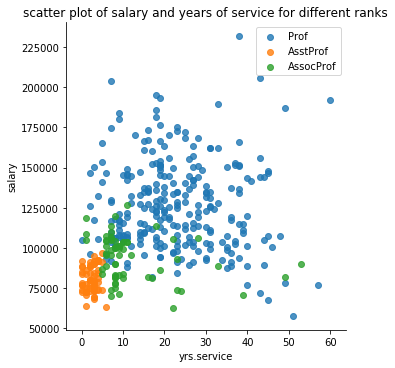

In [18]:
sns.lmplot( x="yrs.service", y="salary", data=df, fit_reg=False, hue='rank', legend=False)
plt.legend(loc='upper right') 
plt.title("scatter plot of salary and years of service for different ranks")

There does not appear to be a strong relationship between nine-month salary and years of service, but there is a relationship between rank and years of service as expected. Faculty members who are Professors or Associate Professors tend to have served longer in departments and therefore hold higher positions and get paid more compared to Assistant Professors

Text(0.5, 1, 'scatter plot of salary and years since Ph.D of different ranks')

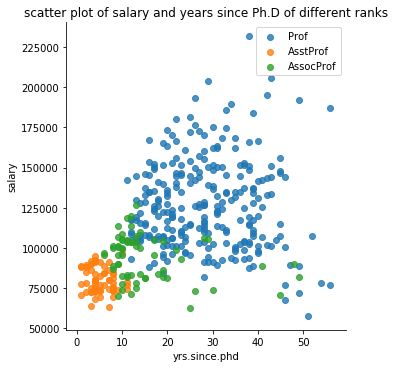

In [19]:
sns.lmplot( x="yrs.since.phd", y="salary", data=df, fit_reg=False, hue='rank', legend=False)
plt.legend(loc='upper right')
plt.title("scatter plot of salary and years since Ph.D of different ranks")

From the above plot,it is possible that the relationship between years since Ph.D. and nine-month salary is non-linear (quadratic specifically) based on the slight curve pattern in the observations from the plot.

It appears that years since Ph.D. is positively correlated with salary. Typically, as the number of years since a faculty member received their Ph.D. increases, their salary increases as well.
Furthermore, we can see that rank is also somewhat positively correlated with years since Ph.D. and salary as well. Assistant Professors appear to have the lowest nine-month salaries receiving between 57,800 to 100,000 dollars.

Associate Professors receive a nine-month salary in the range of 50,000 to 125,000 dollars. Professors tend to have the highest range of nine-month salaries based on the graph.



Text(0.5, 1.0, 'Boxplot of salaries for disciplines')

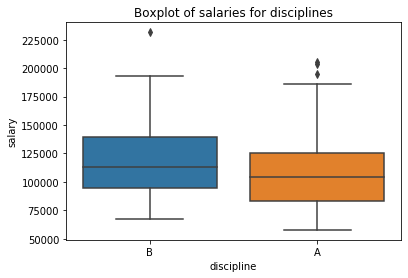

In [20]:
sns.boxplot(x = 'discipline',y = 'salary', data = df)
plt.title("Boxplot of salaries for disciplines")

There is not much difference in salaries by discipline but plotting salaries with discpline along with years since phd or years of service might give better idea

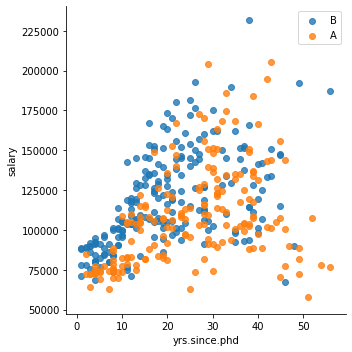

In [21]:
sns.lmplot( x="yrs.since.phd", y="salary", data=df, fit_reg=False, hue='discipline', legend=False)
plt.legend(loc='upper right')# Move the legend to an empty part of the plot 

There does not appear to be a strong relationship between salary and discipline or even between discipline and years since Ph.D. However, it does appear that the data points from faculty members in applied departments are situated higher than data points from faculty members in theoretical departments.

#### (4) How would you recode discipline as a 0/1 binary indicator?

Using pandas get_dummies package

# Model Building

Now we will try to understand which variable will affect nine month salaries

#### Salary ~ Rank

In [22]:
y = df['salary']
x = pd.get_dummies(df[['rank']],columns = ['rank'],drop_first= True)
x.head()

,rank_AsstProf,rank_Prof
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [23]:
X = sm.add_constant(x) 
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           1.29e-43
Time:                        10:15:37   Log-Likelihood:                -4559.8
No. Observations:                 397   AIC:                             9126.
Df Residuals:                     394   BIC:                             9137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.388e+04   2954.209     31.777

According to these results, rank does a significant contribution to nine-month salary at this college as expected. Professors and Associate Professors tend to be more experienced than Assistant Professors and thus paid more in accordance with their faculty ranks. The baseline group in this case is Associate Professors. While Associate Professors at this college have an average nine-month salary of 93,880 dollars, Assistant Professors earn 13,100 dollars less compared to Associate Professors. Similarly, Professors earn an additional 32,900 dollars compared to the nine-month salary of Associate Professors. The amount of variance in salary explained by rank alone in this model is around 39%.

#### Salary ~ Sex

In [24]:
y = df['salary']
x = pd.get_dummies(df[['sex']],columns = ['sex'],drop_first= True)
x.head()

,sex_Male
0,1
1,1
2,1
3,1
4,1


In [25]:
X = sm.add_constant(x) 
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.738
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00567
Time:                        10:15:37   Log-Likelihood:                -4655.4
No. Observations:                 397   AIC:                             9315.
Df Residuals:                     395   BIC:                             9323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.01e+05   4809.386     21.001      0.0

From the above, although the coefficient for the predictor sex is found to be significant in the model, sex only explains around 2% of the variance in salary in this model as expected. These results can be interpreted as saying female faculty members at this college make an average nine-month salary of 101,002 dollars whereas male faculty members make an additional 14,088 dollars more on top of that.

#### Salary ~ Discipline

In [26]:
y = df['salary']
x = pd.get_dummies(df[['discipline']],columns = ['discipline'],drop_first= True)


X = sm.add_constant(x) 
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     9.863
Date:                Fri, 31 Jan 2020   Prob (F-statistic):            0.00181
Time:                        10:15:37   Log-Likelihood:                -4654.4
No. Observations:                 397   AIC:                             9313.
Df Residuals:                     395   BIC:                             9321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.085e+05   2226.586     48.751   

Here, the coefficient of discipline is found to be significant, but only explains around 2% of the variance in salary in this model similar to variable sex. The baseline group is A which suggests that faculty members in theoretical departments make on average 108,500 dollars  whereas faculty members in applied departments (B) make an additional 9,480 dollars compared to members in theoretical departments(B).

#### Salary ~ Years since Ph.D

In [27]:
y = df['salary']
x = df[['yrs.since.phd']]
X = sm.add_constant(x) 
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     84.23
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           2.50e-18
Time:                        10:15:37   Log-Likelihood:                -4620.9
No. Observations:                 397   AIC:                             9246.
Df Residuals:                     395   BIC:                             9254.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.172e+04   2765.792     33.162

From this regression model, years since Ph.D. explains about 17% of the variance in salary. For each additional year since receiving their Ph.D., a faculty member’s salary estimate increases by an additional 985.30 dollars.

From this regression model, years since Ph.D squared explains only about 9% of the variance in salary.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(x) 

lm2 = sm.OLS(y,X_poly)
results = lm2.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     88.95
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           1.32e-32
Time:                        10:15:39   Log-Likelihood:                -4585.3
No. Observations:                 397   AIC:                             9177.
Df Residuals:                     394   BIC:                             9189.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.505e+04   3949.715     16.470      0.0

From the above results,the relationship between years since Ph.D. and nine-month salary is quadratic based on the slight curve pattern in the observations from the plot earlier and it explains about 31% variance But strong multicollinearity as the sign of coefficient of x2 is switched and coefficient is not significant. I'd not move forward with quadratic relationship and stick to linear

#### Salary ~ Years of Service

In [29]:
y = df['salary']
x = df[['yrs.service']]


X = sm.add_constant(x) 
lm2 = sm.OLS(y,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     49.85
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           7.53e-12
Time:                        10:15:39   Log-Likelihood:                -4635.7
No. Observations:                 397   AIC:                             9275.
Df Residuals:                     395   BIC:                             9283.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.997e+04   2416.605     41.370      

From this regression model, years of service explains about 11% of the variance in salary. For each additional year a faculty member has served, their salary estimate increases by an additional $779.60

#### Multiple Linear Regression Model

In [30]:
df_encoded = pd.get_dummies(df,columns = ['rank','sex','discipline'], drop_first= True)

In [31]:
x_data =df_encoded.drop(['salary'], axis= 1)

In [32]:
x_data.head()

,yrs.since.phd,yrs.service,rank_AsstProf,rank_Prof,sex_Male,discipline_B
0,19,18,0,1,1,1
1,20,16,0,1,1,1
2,4,3,1,0,1,1
3,45,39,0,1,1,1
4,40,41,0,1,1,1


In [33]:
y_data = df['salary']

In [34]:
#Adding the column of 1s
X = sm.add_constant(x_data) 
#Fit the model and print output
lm2 = sm.OLS(y_data,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     54.20
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           1.79e-48
Time:                        10:15:39   Log-Likelihood:                -4538.9
No. Observations:                 397   AIC:                             9092.
Df Residuals:                     390   BIC:                             9120.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.886e+04   4990.326     15.803

It is clear in this model that the least statistically significant variable is sex (with a p-value of aprroximately 0.22). Interestingly, the coefficient for years of service has switched signs. In the SLR model above run with years of service (Salary~Years of Service), the coefficient was 779.60  whereas in the full model here it is -489.50. This could be a sign of collinearity.

For now, let’s see what happens if we take out the predictor sex. In this case, I think removing sex is justified because it is statistically insignificant in the model.

In [35]:
results.mse_resid

507990598.7822486

In [36]:
x_data1 = x_data.drop(['sex_Male'],axis = 1) 

In [37]:
#Adding the column of 1s
X = sm.add_constant(x_data1) 
#Fit the model and print output
lm2 = sm.OLS(y_data,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     64.64
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           4.51e-49
Time:                        10:15:39   Log-Likelihood:                -4539.7
No. Observations:                 397   AIC:                             9091.
Df Residuals:                     391   BIC:                             9115.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           8.27e+04   3916.719     21.115

In this model, all variables are found to be significant with p-values <0.05. The adjusted R-squared value did not change much with the removal of the predictor sex. The coefficient for years of service is still negative, but reduced to $-476.70 which is evidence of multicollinearity

We did see above that years since Ph.D., rank, and years of service show some of the strongest associations with salary and somewhat correlate with each other.

To check this, let’s compute the Variance Inflation Factor (VIF) for the model above.

In [38]:
results.mse_resid

508688004.8056815

In [39]:
pd.Series([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const            11.972470
yrs.since.phd     7.518920
yrs.service       5.908984
rank_AsstProf     1.883453
rank_Prof         2.156100
discipline_B      1.063139
dtype: float64

According to the results, the VIF for years since Ph.D. is 7.518 and for years of service is 5.908. A VIF value >5 or >10 is a sign of collinearity that can considerably affect results. Let’s further check by first assessing what happens if we take out years since Ph.D.

In [40]:
x_data2 = x_data1.drop(['yrs.since.phd'], axis = 1)

In [41]:
#Adding the column of 1s
X = sm.add_constant(x_data2) 
#Fit the model and print output
lm2 = sm.OLS(y_data,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     78.78
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           5.35e-49
Time:                        10:15:39   Log-Likelihood:                -4542.2
No. Observations:                 397   AIC:                             9094.
Df Residuals:                     392   BIC:                             9114.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.674e+04   3485.121     24.888

In [42]:
results.mse_resid

513768062.76318944

In [43]:
pd.Series([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const            9.385535
yrs.service      1.613750
rank_AsstProf    1.822681
rank_Prof        1.947401
discipline_B     1.028057
dtype: float64

In this model, taking out years since Ph.D. solved collinearity a little. The VIF estimate for years of service went down to 1.61. However, the sign of the coefficient for years of service is still negative.

Now I'd like to remove years of service instead of Years since Phd

In [44]:
x_data3 = x_data1.drop(['yrs.service'], axis = 1)

#Adding the column of 1s
X = sm.add_constant(x_data3) 

#Fit the model and print output
lm2 = sm.OLS(y_data,X)
results = lm2.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     78.72
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           5.76e-49
Time:                        10:15:39   Log-Likelihood:                -4542.2
No. Observations:                 397   AIC:                             9094.
Df Residuals:                     392   BIC:                             9114.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.444e+04   3859.950     21.875

In [45]:
results.mse_resid

513962493.6468182

In [46]:
pd.Series([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const            11.508597
yrs.since.phd     2.053425
rank_AsstProf     1.882600
rank_Prof         2.138179
discipline_B      1.054461
dtype: float64

In this case, taking out years of service did not change the adjusted R-squared value much compared to the full model and none of the remaining variables have a high VIF.

I think taking out years of service as a variable is justified in this case as there was a collinearity issue, taking out one of the problematic variables is a way to control for collinearity. Since collinearity means 2 or more variables are closely related, removing one of the variables does not affect the amount of information in the model because it is redundant information

Furthermore, in this model, by taking out years of service, the adjusted R-squared was not affected significantly compared to the model fit with all the variables except sex. 

Even though the coefficient for years since Ph.D. drops out of significance, I think this model is reasonable. Though this is reasonable I'd like to continue further by removing years since Ph.D. and see the reduction in R-squared

So from above breid analysis , I believe that the best multiple linear regression model I can currently construct for the Salaries dataset in order to predict nine-month salary has the two predictors rank and discipline.

Here is a summary of this final model

In [47]:
x_data4 = x_data3.drop(["yrs.since.phd"], axis= 1)

In [48]:
X = sm.add_constant(x_data4) 
#Fit the model and print output
lm2 = sm.OLS(y_data,X)
results = lm2.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     105.0
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           6.05e-50
Time:                        10:15:39   Log-Likelihood:                -4542.4
No. Observations:                 397   AIC:                             9093.
Df Residuals:                     393   BIC:                             9109.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.571e+04   3142.502     27.273

The predictors in this case explain about 44% of the variance in nine-month salary.I think this is justified because there are still other factors that contribute to determining nine-month salary for faculty members at this college that are absent in this dataset or not well understood yet (such as years since Ph.D. and years of service). 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [50]:
LR = LinearRegression()

In [51]:
scores = cross_val_score(LR, x_data4, y_data, cv=10)
scores.mean()

0.4264265874120974

### Classification

#### Build a new model using this indicator as the response, using the same set of predictors used to build the previous model


The set of predictors used to build previous model are rank and discipline.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#### In addition, create a 0/1 binary indicator using salary, where the indicator has a value of 0 if the salary is below the median and 1 otherwise

In [53]:
salary_cat = pd.cut(df.salary,bins=[0,df.salary.median()-1,df.salary.max()],labels=[0,1])

In [54]:
df.insert(5,'salary_cat',salary_cat)

Text(0.5, 1.0, 'count of different ranks for each salary_cat catergory')

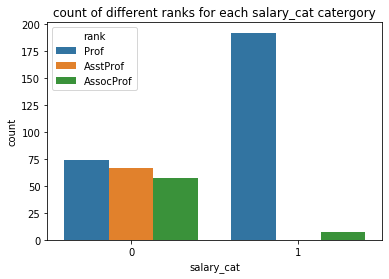

In [55]:
sns.countplot(x="salary_cat", hue= "rank", data = df)
plt.title("count of different ranks for each salary_cat catergory")

There is significant difference between ranks in 1 catergory of salary_cat but all the ranks almost same in 0 catergory

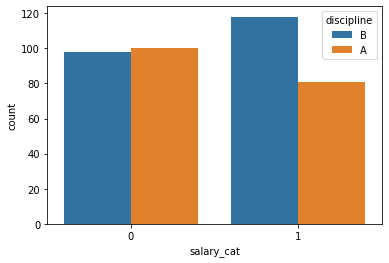

In [56]:
sns.countplot(x="salary_cat", hue= "discipline", data = df)

There appears to be no significant difference in between disciplines 

### Logistic Regression

In [57]:
lr = LogisticRegression(C=100)

In [58]:
x_data4.head()

,rank_AsstProf,rank_Prof,discipline_B
0,0,1,1
1,0,1,1
2,1,0,1
3,0,1,1
4,0,1,1


In [59]:
y_data = df['salary_cat']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x_data4, y_data, test_size=0.33, random_state=24)

In [61]:
lr.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
yhat = lr.predict(X_test)

In [63]:
confusion_matrix(y_test,yhat)

array([[33, 30],
       [ 2, 67]], dtype=int64)

In [64]:
accuracy_score(y_test,yhat)

0.7575757575757576

Because we are using only two attributes and also there are still other factors that contribute to determining nine-month salary for faculty members at this college that are absent in this dataset the classification accuracy will be almost same idependent of the classification model

I've used some of other classification techniques below 

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf = RandomForestClassifier(n_estimators = 200,n_jobs = -1,random_state = 0)

In [67]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [68]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[33, 30],
       [ 2, 67]], dtype=int64)

In [69]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.7575757575757576

### LDA

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[33, 30],
       [ 2, 67]], dtype=int64)

In [71]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.7575757575757576

# Data Set Enhancement

#### (1) State at least three research questions you would like to address and describe your thought process behind how you formulated these research questions. 

1. Is there a significant relationship between rank, years of service and years since phd? 
This is because rank of faculty depends on his experience, research work and many other factors. But my question addresses significance of attributes years of service and years since phd on rank of faculty members. Based on the data given, we'll be able to find out if rank is only dependent time of service, what are the chances of faculty members with less years of service to get better rank etc
2. What is effect of faculty profile on salary?
For example, Faculty Research profile like research work discipline, Papers published, Academic ranks etc help us to understand the faculty expertise,  Faculty rank and pay are depended on this research area
3. Is there significant difference in years of service between different ranks?
This question gives us understand on significance of years of service for faculty to get promoted 

#### (2) Prepare a list of 5-7 additional attributes you would like to add to the data set. Prepare a brief explanation for each attribute. 

Additional Atrributes:
    1. Discipline - The attribute discipline provided is not suffice. for example salaries for faculty vary dramatically from discipline to discipline. A faculty of English makes a very different salary than a faculty of business administration, even at the same institution. It should be categorical attribute with categories like business administration, engineering, humanities, science etc
    2. Institution type - Nature of Institution, Institution ranking in the country, Research Ranking, 
    3. Tenure Status - Categorical variable saying tenure status of a faculty
    4. Research Profile - Faculty focused in research tend to have higher salary than who teach, so research profile could be categorical indicating amount of research faculty do at universities
    5. Administrative - holding an administrative position has affect on salary, this could be simple yes,no categorical attribute
    6. Special Academics ranks - Distinguished (teaching/research) professor, Named/endowed chair, etc
    7. Type - Categorical variable with two categories teaching focused or research focused

#### (3) Estimate and justify the appropriate sample size (and sampling technique, if desired) that would be required to address the research questions you defined. 

Any sample size greater than 4000 would with most of the above mentioned attributes will help to address the research questions 

### End of Project